<a href="https://colab.research.google.com/github/Anvarbekk/AI-application/blob/main/week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Category:  8


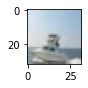

In [17]:
import torchvision
import torchvision. transforms as transforms
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader
import numpy as np 
import matplotlib.pyplot as plt
# Load training dataset into a single batch.
transform = transforms.Compose ( [transforms. ToTensor ()])
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
trainloader = DataLoader (trainset, batch_size=len(trainset), shuffle=False)
data = next(iter (trainloader))
# Convert to numpy arrays of correct shape for plotting.
train_images = data[0].numpy ()
train_images = np.moveaxis(train_images, 1, 3)
train_labels = data[1].numpy ()
print ('Category: ', train_labels [100])
plt.figure(figsize=(1, 1)) 
plt. imshow(train_images [100]) 
plt.show()

In [18]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import requests 
# Save datagenerators as file to colab working directory
# If you are using GitHub , make sure you get the "Raw " version of the code 
url = 'https://raw.githubusercontent.com/NVDLI/LDL/main/pt_framework/utilities.py'
r = requests.get(url)


# make sure your filename is the same as how you want to import
with open('utilities.py', 'w') as f:
  f.write(r.text)

In [38]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms 
from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader 
import numpy as np
from utilities import train_model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
EPOCHS = 41
BATCH_SIZE = 32
# Load training dataset into a single batch to compute mean and stddev.
transform = transforms. Compose([transforms. ToTensor ()])
trainset = CIFAR10(root='./pt_data', train=True, download=True, transform=transform)
trainloader = DataLoader (trainset, batch_size=len(trainset), shuffle=False)
data = next(iter (trainloader))
mean = data[0].mean ()
stddev = data[0].std()

Files already downloaded and verified


In [39]:
transform=transforms.Compose( 
    [transforms.ToTensor(),
     transforms.Normalize(mean,stddev)])

trainset = CIFAR10(root='./pt_data', train=True, download=True,transform=transform) 
testset = CIFAR10(root='./pt_data', train=False, download=True,transform=transform)


model = nn. Sequential(
    nn.Conv2d(3, 64, 5, stride=2, padding=2),
    nn.ReLU(),
    nn. Conv2d(64, 64, 3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear (64*8*8, 10)
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
layers = next (model.modules())
conv_layer0=layers[0]
conv_layer1=layers[2]
output_layer=layers[5]

nn.init.kaiming_normal_(conv_layer0.weight)
nn.init.constant(conv_layer0.bias,0.0)

nn.init.kaiming_normal_(conv_layer1.weight)
nn.init.constant (conv_layer1.bias, 0.0)

nn. init.xavier_uniform (output_layer.weight)
nn.init.constant (output_layer.bias, 0.0)

optimizer = torch.optim.Adam(model.parameters()) 
loss_function = nn.CrossEntropyLoss()

train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset, optimizer, loss_function, 'acc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  del sys.path[0]


Epoch 1/41 loss: 1.4220 - acc: 0.4993 - val_loss: 1.1762 - val_acc: 0.5898
Epoch 2/41 loss: 1.0771 - acc: 0.6248 - val_loss: 1.0954 - val_acc: 0.6194
Epoch 3/41 loss: 0.9330 - acc: 0.6766 - val_loss: 1.0366 - val_acc: 0.6477
Epoch 4/41 loss: 0.8354 - acc: 0.7096 - val_loss: 1.0204 - val_acc: 0.6520
Epoch 5/41 loss: 0.7511 - acc: 0.7387 - val_loss: 1.0498 - val_acc: 0.6570
Epoch 6/41 loss: 0.6735 - acc: 0.7655 - val_loss: 1.1283 - val_acc: 0.6371
Epoch 7/41 loss: 0.6139 - acc: 0.7835 - val_loss: 1.1644 - val_acc: 0.6406
Epoch 8/41 loss: 0.5565 - acc: 0.8028 - val_loss: 1.1944 - val_acc: 0.6557
Epoch 9/41 loss: 0.5129 - acc: 0.8186 - val_loss: 1.2475 - val_acc: 0.6403
Epoch 10/41 loss: 0.4668 - acc: 0.8340 - val_loss: 1.3653 - val_acc: 0.6329
Epoch 11/41 loss: 0.4254 - acc: 0.8484 - val_loss: 1.4495 - val_acc: 0.6258
Epoch 12/41 loss: 0.3940 - acc: 0.8606 - val_loss: 1.5170 - val_acc: 0.6242
Epoch 13/41 loss: 0.3641 - acc: 0.8706 - val_loss: 1.5987 - val_acc: 0.6332
Epoch 14/41 loss: 0.3